Bayesian Network Structure:
BN{nodes: 7, arcs: 6, domainSize: 384, dim: 25, mem: 360o}


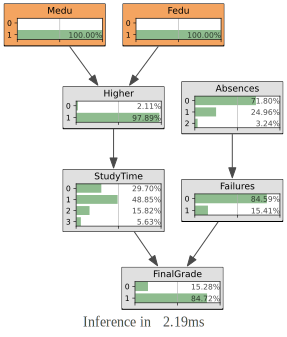

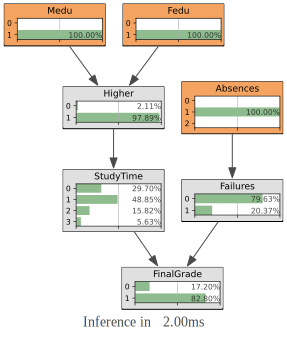

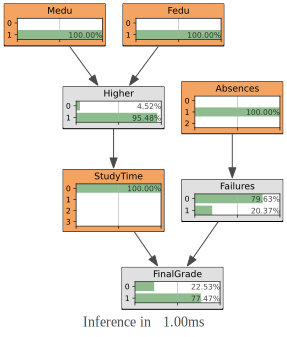

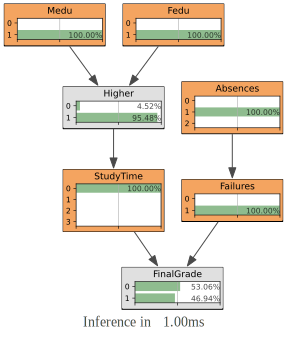


Posterior distribution of FinalGrade:

  FinalGrade       |
0        |1        |
---------|---------|
 0.5306  | 0.4694  |



In [7]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb  # for graphical visualization
# Initialize the Bayesian Network
bn = gum.BayesNet('StudentPerformance')

# Add Nodes to the Network
medu = bn.add(gum.LabelizedVariable("Medu", "Mother's Education", 2))  # 0: No Higher Education, 1: Higher Education
fedu = bn.add(gum.LabelizedVariable("Fedu", "Father's Education", 2))  # 0: No Higher Education, 1: Higher Education
higher = bn.add(gum.LabelizedVariable("Higher", "Higher Education", 2))  # 0: No, 1: Yes
absences = bn.add(gum.LabelizedVariable("Absences", "Absences", 3))  # 0: Low, 1: Medium, 2: High
studytime = bn.add(gum.LabelizedVariable("StudyTime", "Study Time", 4))  # 0: Very Low, 1: Low, 2: Medium, 3: High
failures = bn.add(gum.LabelizedVariable("Failures", "Failures", 2))  # 0: 0, 1: 1, 2: More than 1
final_grade = bn.add(gum.LabelizedVariable("FinalGrade", "Final Grade", 2))  # 0: Fail, 1: Pass

# Add arcs (dependencies) as per the Bayesian network structure
bn.addArc(medu, higher)
bn.addArc(fedu, higher)
bn.addArc(higher, studytime)
bn.addArc(absences, failures)
bn.addArc(studytime, final_grade)
bn.addArc(failures, final_grade)

# Set CPT for Medu (Root node)
bn.cpt(medu)[0] = 0.7303543913713405
bn.cpt(medu)[1] = 0.2696456086286595

# Set CPT for Fedu (Root node)
bn.cpt(fedu)[0] = 0.802773497688752
bn.cpt(fedu)[1] = 0.19722650231124808

# Set CPT for Absences (Root node)
bn.cpt(absences)[0] = 0.7180277349768875  # Low
bn.cpt(absences)[1] = 0.24961479198767333  # Medium
bn.cpt(absences)[2] = 0.032357473035439135  # High

# Set CPT for Higher (Dependent on Medu and Fedu)
bn.cpt(higher)[0, 0] = [0.15192743764172337, 0.8480725623582767]  # Medu=0, Fedu=0
bn.cpt(higher)[0, 1] = [0.0, 1.0]  # Medu=0, Fedu=1
bn.cpt(higher)[1, 0] = [0.0, 1.0]  # Medu=1, Fedu=0
bn.cpt(higher)[1, 1] = [0.021052631578947368, 0.9789473684210527]  # Medu=1, Fedu=1

# Set CPT for Failures (Dependent on Absences)
bn.cpt(failures)[0] = [0.869098712446352, 0.13090128755364808] 
bn.cpt(failures)[1] = [0.7962962962962963, 0.2037037037037037]
bn.cpt(failures)[2] = [0.7142857142857143, 0.2857142857142857]

# Set CPT for Study Time (Dependent on Higher)
bn.cpt(studytime)[0] = [0.6376811594202898, 0.2753623188405797, 0.057971014492753624, 0.028985507246376812]  # Higher=No
bn.cpt(studytime)[1] = [0.2896551724137931, 0.49310344827586206, 0.16034482758620688, 0.056896551724137934]  # Higher=Yes

# Set CPT for FinalGrade (Dependent on Failures and StudyTime)
bn.cpt(final_grade)[0, 0] = [0.147239263803681, 0.852760736196319]  # Failures=0, StudyTime=Very Low
bn.cpt(final_grade)[0, 1] = [0.08712121212121213, 0.9128787878787878]  # Failures=0, StudyTime=Low
bn.cpt(final_grade)[0, 2] = [0.033707865168539325, 0.9662921348314607]  # Failures=0, StudyTime=Medium
bn.cpt(final_grade)[0, 3] = [0.030303030303030304, 0.9696969696969697]  # Failures=0, StudyTime=High
bn.cpt(final_grade)[1, 0] = [0.5306122448979592, 0.46938775510204084]  # Failures=1, StudyTime=Very Low
bn.cpt(final_grade)[1, 1] = [0.43902439024390244, 0.5609756097560976]  # Failures=1, StudyTime=Low
bn.cpt(final_grade)[1, 2] = [0.5, 0.5]  # Failures=1, StudyTime=Medium
bn.cpt(final_grade)[1, 3] = [0.5, 0.5]  # Failures=1, StudyTime=High


# Print the structure of the network
print("Bayesian Network Structure:")
print(bn)

# # Print the CPTs for each node
# nodes = ['Medu', 'Fedu', 'Absences', 'Higher', 'Failures', 'StudyTime', 'FinalGrade']
# for node in nodes:
#     print(f"\nCPT of {node}:")
#     print(bn.cpt(bn.idFromName(node)))

# Save the Bayesian network to a file
gum.saveBN(bn, 'student_performance.bif')

# Inference Example: Predict Final Grade
ie = gum.LazyPropagation(bn)






#BBelow: Changing study time to view effect on whether they want to pursue higher education or not: This is the second 
#example of the first section in the analysis and testing section of the report

# ie.setEvidence({
#     'Medu': 0,  # Higher Education for Mother
#     'Fedu': 0,  # Higher Education for Father
#     'Absences' : 1,  # Yes to Higher Education
#     'StudyTime': 0,  # Medium Study Time
#     'Failures': 1  # No Failures
# })

# gnb.showInference(bn, evs={'Medu': 0, 'Fedu': 0, 'Absences': 1, 'StudyTime': 0, 'Failures': 1})

# ie.setEvidence({
#     'Medu': 0,  # Higher Education for Mother
#     'Fedu': 0,  # Higher Education for Father
#     'Absences' : 1,  # Yes to Higher Education
#     'StudyTime': 2,  # Medium Study Time
#     'Failures': 1  # No Failures
# })


# gnb.showInference(bn, evs={'Medu': 0, 'Fedu': 0, 'Absences': 1, 'StudyTime': 2, 'Failures': 1})


# ie.setEvidence({
#     'Medu': 1,  # Higher Education for Mother
#     'Fedu': 1,  # Higher Education for Father
#     'Absences' : 1,  # Yes to Higher Education
#     'StudyTime': 2,  # Medium Study Time
#     'Failures': 1  # No Failures
# })


# gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1, 'Absences': 1, 'StudyTime': 2, 'Failures': 1})





#Below is the FIRST example in the first section of the report, showing bayesian inference on the target node, 
#FinalGrade, given the evidence of the other nodes

ie.setEvidence({
    'Medu': 1,  # Higher Education for Mother
    'Fedu': 1,  # Higher Education for Father
  
   
    # No Failures
})


gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1})

ie.setEvidence({
    'Medu': 1,  # Higher Education for Mother
    'Fedu': 1,  # Higher Education for Father
    'Absences' : 1,  # Yes to Higher Education
   
    # No Failures
})


gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1, 'Absences': 1})

ie.setEvidence({
    'Medu': 1,  # Higher Education for Mother
    'Fedu': 1,  # Higher Education for Father
    'Absences' : 1,  # Yes to Higher Education
    'StudyTime': 0,  # Medium Study Time
   
    # No Failures
})


gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1, 'Absences': 1, 'StudyTime': 0})

ie.setEvidence({
    'Medu': 1,  # Higher Education for Mother
    'Fedu': 1,  # Higher Education for Father
    'Absences' : 1,  # Yes to Higher Education
    'StudyTime': 0,  # Medium Study Time
    'Failures': 1
   
    # No Failures
})


gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1, 'Absences': 1, 'StudyTime': 0, 'Failures': 1})




ie.makeInference()
print("\nPosterior distribution of FinalGrade:")
print(ie.posterior(bn.idFromName('FinalGrade')))

# gnb.showInference(bn, evs={'Medu': 1, 'Fedu': 1, 'Absences': 1, 'StudyTime': 2, 'Failures': 0})


#gnb.showInference(bn, evs={'Medu': 0, 'Fedu': 0, 'Absences': 1, 'Failures': 1})

In [8]:
bn.cpt(medu)

(pyAgrum.Potential<double>@000002E67176C110) 
  Medu             |
0        |1        |
---------|---------|
 0.7304  | 0.2696  |

In [9]:
bn.cpt(fedu)

(pyAgrum.Potential<double>@000002E67176C1D0) 
  Fedu             |
0        |1        |
---------|---------|
 0.8028  | 0.1972  |

In [ ]:
bn.cpt(absences)

In [3]:
bn.cpt(higher)

(pyAgrum.Potential<double>@000002E670ED74F0) 
             ||  Higher           |
Medu  |Fedu  ||0        |1        |
------|------||---------|---------|
0     |0     || 0.8481  | 0.1519  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.9789  | 0.0211  |

In [13]:
bn.cpt(failures)

(pyAgrum.Potential<double>@000001FD34EA1020) 
      ||  Failures                   |
Absenc||0        |1        |2        |
------||---------|---------|---------|
0     || 0.8487  | 0.1061  | 0.0452  |
1     || 0.6250  | 0.2500  | 0.1250  |
2     || 0.0000  | 0.0000  | 0.0000  |

In [14]:
bn.cpt(studytime)

(pyAgrum.Potential<double>@000001FD34EA1760) 
      ||  StudyTime                            |
Higher||0        |1        |2        |3        |
------||---------|---------|---------|---------|
0     || 0.6377  | 0.2754  | 0.0580  | 0.0290  |
1     || 0.2897  | 0.4931  | 0.1603  | 0.0569  |

In [15]:
bn.cpt(final_grade)

(pyAgrum.Potential<double>@000001FD34EA1480) 
             ||  FinalGrade       |
StudyT|Failur||0        |1        |
------|------||---------|---------|
0     |0     || 0.1472  | 0.8528  |
1     |0     || 0.0871  | 0.9129  |
2     |0     || 0.0337  | 0.9663  |
3     |0     || 0.0303  | 0.9697  |
0     |1     || 0.5000  | 0.5000  |
1     |1     || 0.3462  | 0.6538  |
2     |1     || 0.6667  | 0.3333  |
3     |1     || 0.5000  | 0.5000  |
0     |2     || 0.6154  | 0.3846  |
1     |2     || 0.6000  | 0.4000  |
2     |2     || 0.0000  | 1.0000  |
3     |2     || 0.0000  | 0.0000  |

In [16]:


# You can loop through all nodes and display their CPTs
for node in ['Medu', 'Fedu', 'Higher', 'Absences', 'Failures', 'StudyTime', 'FinalGrade']:
    print(f"\nCPT of {node}:")
    gnb.showPotential(bn.cpt(node))


CPT of Medu:



CPT of Fedu:



CPT of Higher:



CPT of Absences:



CPT of Failures:



CPT of StudyTime:



CPT of FinalGrade:


Illustrating Inference Results
To visualize the results of inference (e.g., after setting evidence), you can use the following:

In [18]:
# Inference example
ie = gum.LazyPropagation(bn)
ie.setEvidence({
    'Medu': 1,
    'Fedu': 0,
    'Higher': 1,
    'StudyTime':0,
    'Failures': 1
})
ie.makeInference()

# Display the posterior distribution of FinalGrade
gnb.showPotential(ie.posterior(bn.idFromName('FinalGrade')))
